In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import chardet

file_path = 'C:/Users/ks615/Downloads/Compressed/Sample - Superstore.csv/Sample - Superstore.csv'

# Detect the encoding
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

print(f"Detected encoding: {result['encoding']}")

# Read the file with the detected encoding
df = pd.read_csv(file_path, encoding=result['encoding'])

# Display the first few rows
print(df.head())

Detected encoding: Windows-1252
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-

In [3]:
# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Summary statistics for numerical columns
print("\nSummary statistics:")
print(df.describe())

# Unique values in categorical columns
print("\nUnique values in categorical columns:")
print(df[['Segment', 'Category', 'Sub-Category', 'Region']].nunique())

Missing values in the dataset:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Number of duplicate rows: 0

Summary statistics:
            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     

In [4]:
# Convert 'Order Date' and 'Ship Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

# Extract year, month, and day from 'Order Date'
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day

# Check the updated dataset
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11


C:\Users\ks615\AppData\Local\Temp\ipykernel_9960\2979477428.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')
C:\Users\ks615\AppData\Local\Temp\ipykernel_9960\2979477428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')


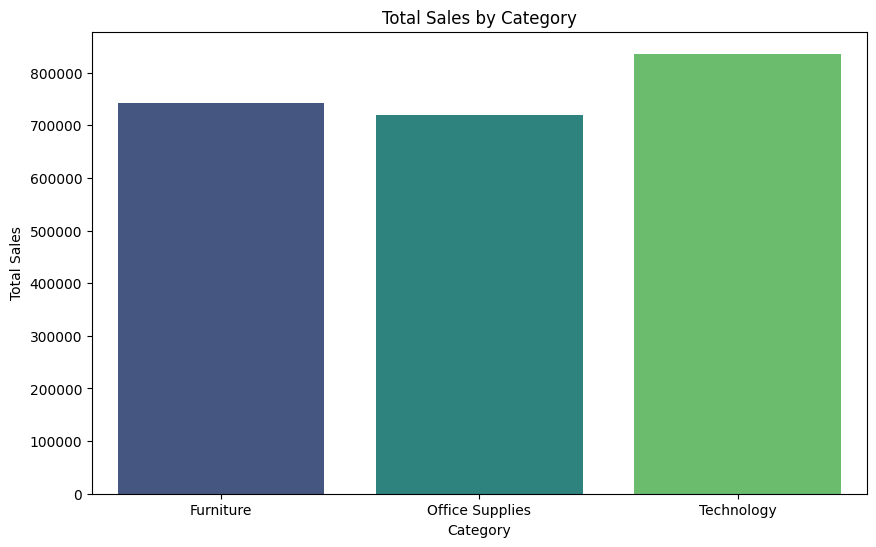

In [5]:
# Plot sales distribution by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

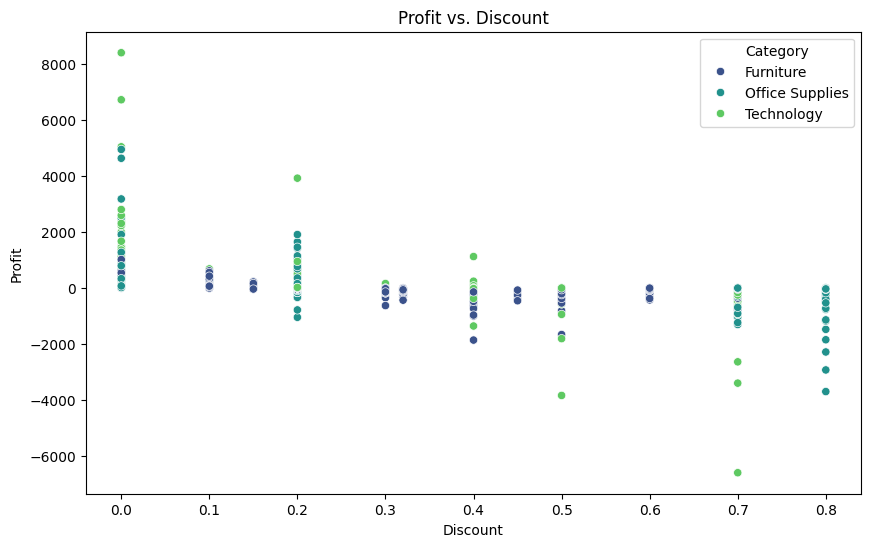

In [6]:
# Scatter plot of Profit vs. Discount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Category', palette='viridis')
plt.title('Profit vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

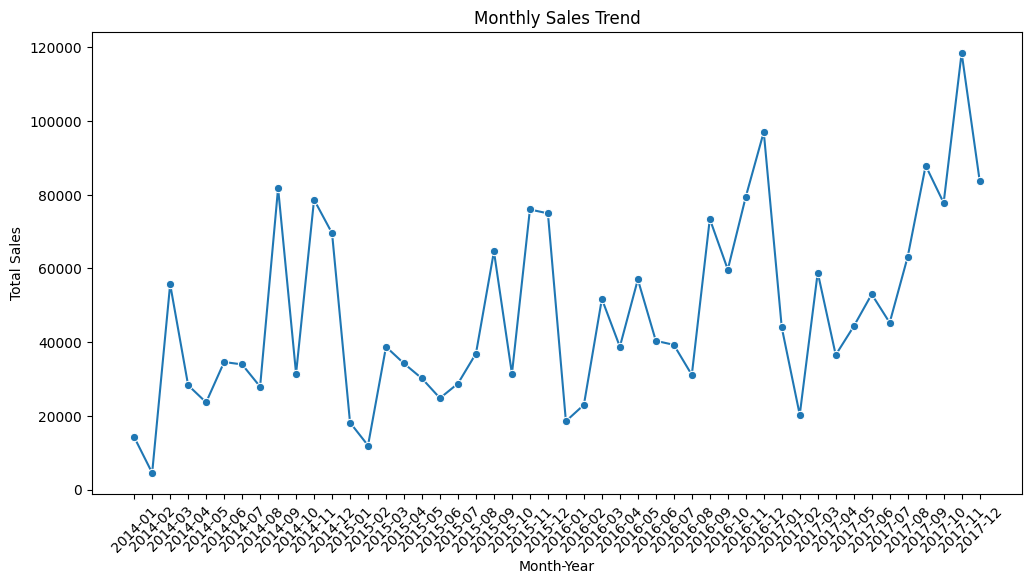

In [13]:
# Group by year and month for sales trend
df['Order Month-Year'] = df['Order Date'].dt.to_period('M').astype(str)  # Convert to string
monthly_sales = df.groupby('Order Month-Year')['Sales'].sum().reset_index()

# Plot sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Month-Year', y='Sales', data=monthly_sales, marker='o')

plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')

# Correct xticks setting
plt.xticks(ticks=range(0, len(monthly_sales)), labels=monthly_sales['Order Month-Year'], rotation=45)

plt.show()

C:\Users\ks615\AppData\Local\Temp\ipykernel_9960\838407939.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Segment', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')
C:\Users\ks615\AppData\Local\Temp\ipykernel_9960\838407939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')


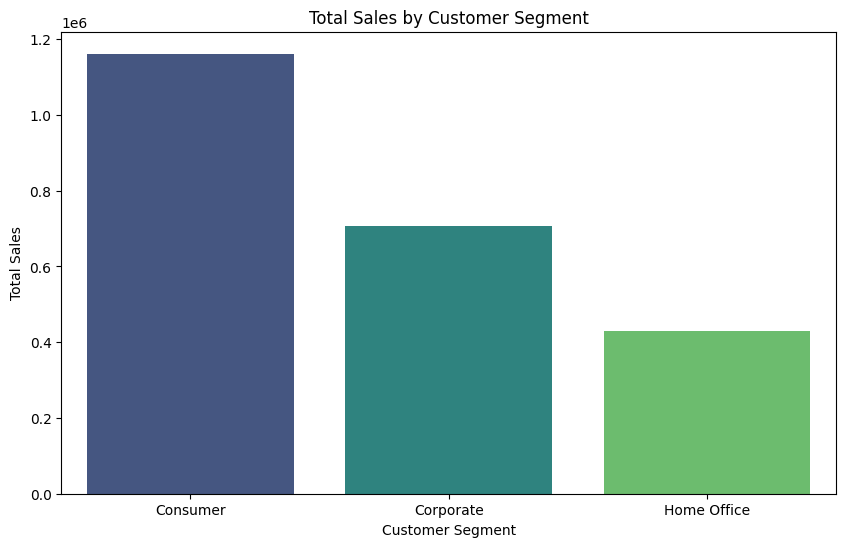

In [9]:
# Plot total sales by customer segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()

C:\Users\ks615\AppData\Local\Temp\ipykernel_9960\1801069346.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Profit', data=df, estimator=sum, ci=None, palette='viridis')
C:\Users\ks615\AppData\Local\Temp\ipykernel_9960\1801069346.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=df, estimator=sum, ci=None, palette='viridis')


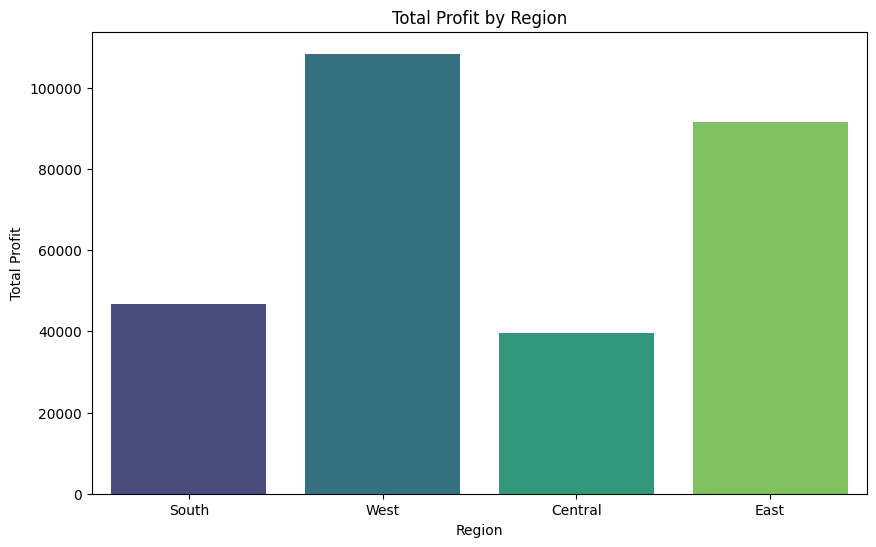

In [10]:
# Plot total profit by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

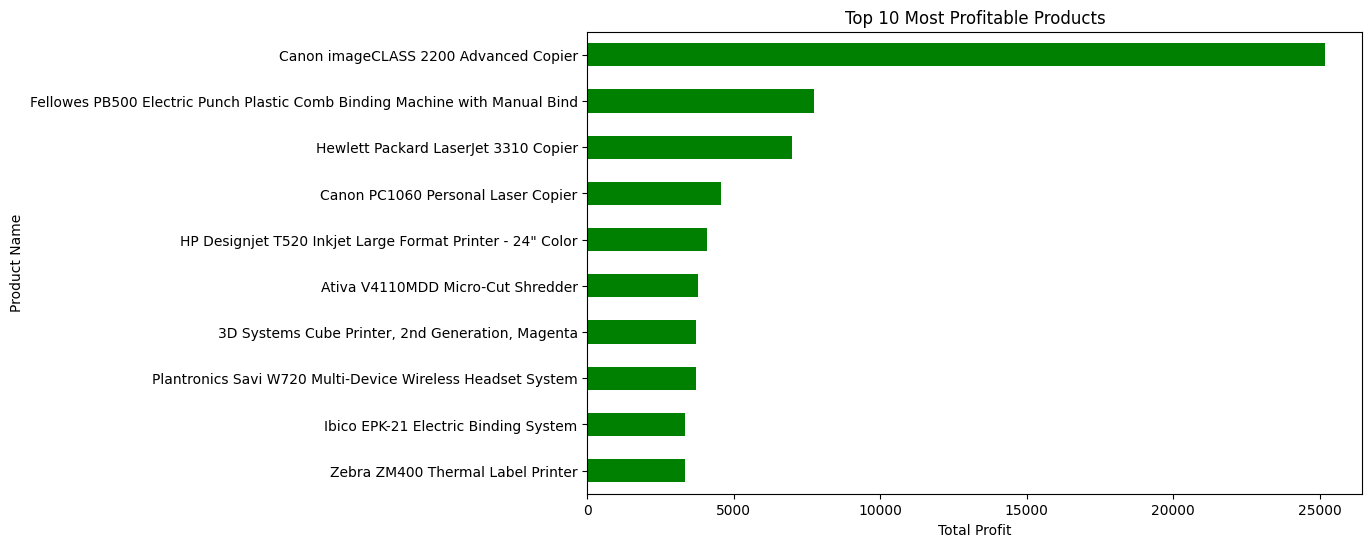

In [14]:
## Most Profitable Products
top_profitable = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
top_profitable.plot(kind='barh', figsize=(10, 6), color='green')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.show()

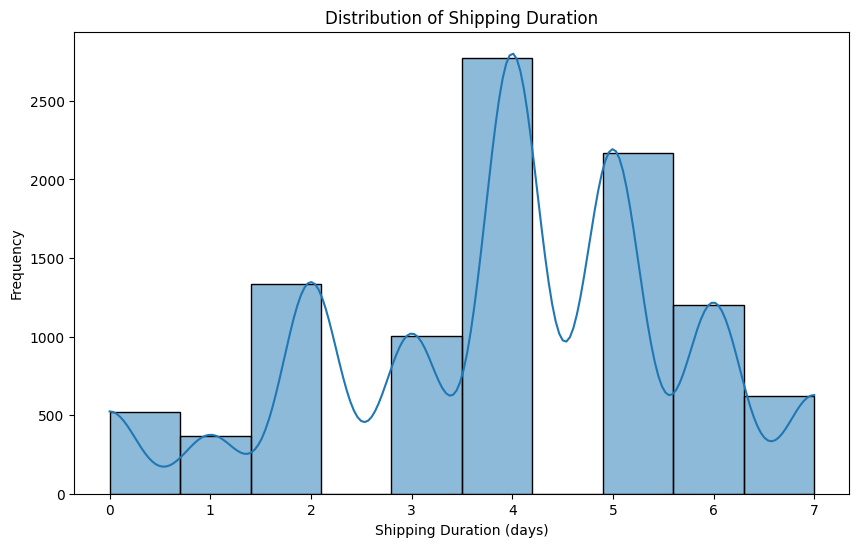

In [15]:
## Shipping Time Analysis
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days
plt.figure(figsize=(10, 6))
sns.histplot(df['Shipping Duration'], bins=10, kde=True)
plt.title('Distribution of Shipping Duration')
plt.xlabel('Shipping Duration (days)')
plt.ylabel('Frequency')
plt.show()